In [1]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

%load_ext autoreload
%autoreload 2

In [2]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.65,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 100,
              'delay': 500}

## Parallel Simulation

In [6]:
#initializing params object
params = Params.from_dict({**PARAMS_DICT, 'th': 0.65, 'sigma':0.01, 'tau': 150})
#params = Params(ntrials=5)

#initializing simulation class
parsim = ParallelSimulation(params)

#simulation
stimulus = 500
K = 5.0
initI = 0.8
par_result = parsim.simulate(stimulus, K, initI)

Stimulus: 500 , Production of trial 10 (blue): 520


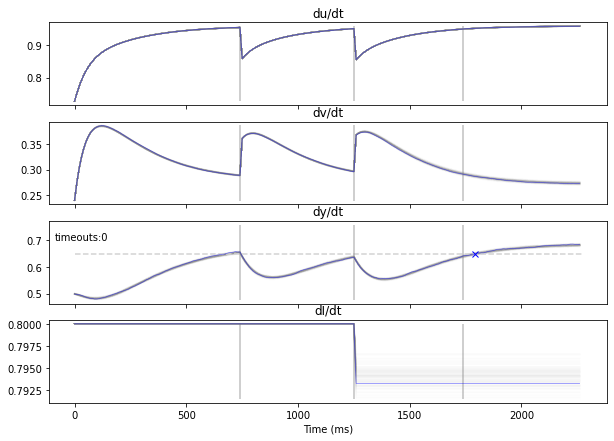

In [7]:
plot = SimulationPlot(par_result.create_simulation_plot_data())
alpha=0.01
plot.plot_trials(alpha)
plot.plot_example_trial(stimulus, 10)

In [49]:
#simulation
stimulus_range = [400,500,600,700,800]
K = 5.0
initI = 0.8
par_range_result = parsim.simulate_range(stimulus_range, K, initI)

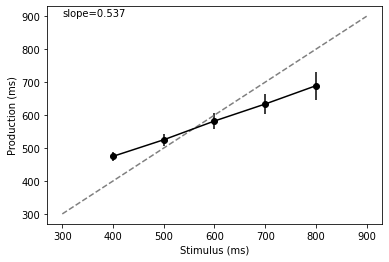

In [9]:
plot = BehavioralPlot(par_range_result.create_behavioral_plot_data())
plot.plot_behavior()

## Experiment Simulation

In [75]:
params = Params.from_dict({**PARAMS_DICT, 'ntrials': 10})
expsim = ExperimentSimulation(params)

stimulus_range = [400,500,600,700,800]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
#stimulus_lst = [1000,400, 800, 400]

K = 5.0
initI = 0.8
exp_result = expsim.simulate(stimulus_lst, K, initI)

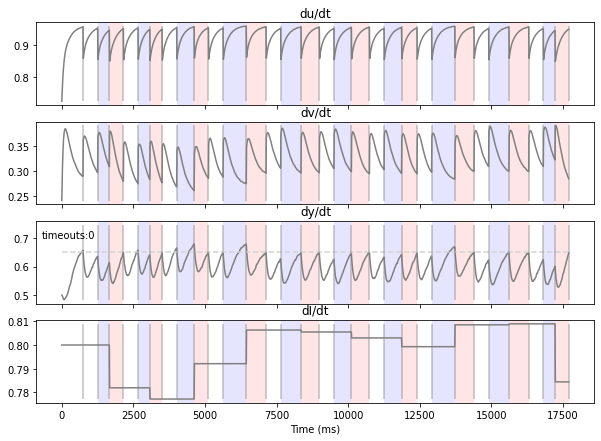

In [76]:
alpha = 1
# plot = SimulationPlot(exp_result.create_simulation_plot_data())
plot = exp_result.create_simulation_plot()
plot.plot_trials(alpha)
plot.plot_measurement_production_frames()

timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]


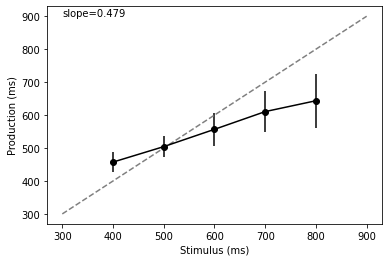

In [64]:
params = Params.from_dict({**PARAMS_DICT, 'ntrials': 500})
expsim = ExperimentSimulation(params)

stimulus_range = [400,500,600,700,800]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
K = 5.0
initI = 0.8

exp_result = expsim.simulate(stimulus_lst, K, initI)
plot = exp_result.create_behavioral_plot()
#plot = BehavioralPlot(exp_result.create_behavioral_plot_data_experiment_simulation())
plot.plot_behavior()

# Exploring Parameter: K, $\tau$, $\sigma$, threshold

timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]


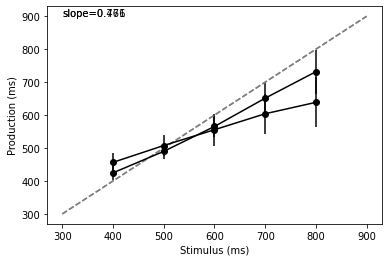

In [65]:
K = 7
initI = 0.8
exp_result = expsim.simulate(stimulus_lst, K, initI)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

K = 5.0
initI = 0.8
exp_result = expsim.simulate(stimulus_lst, K, initI)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]
timeouts: [(400, 0), (500, 0), (600, 0), (700, 0), (800, 0)]


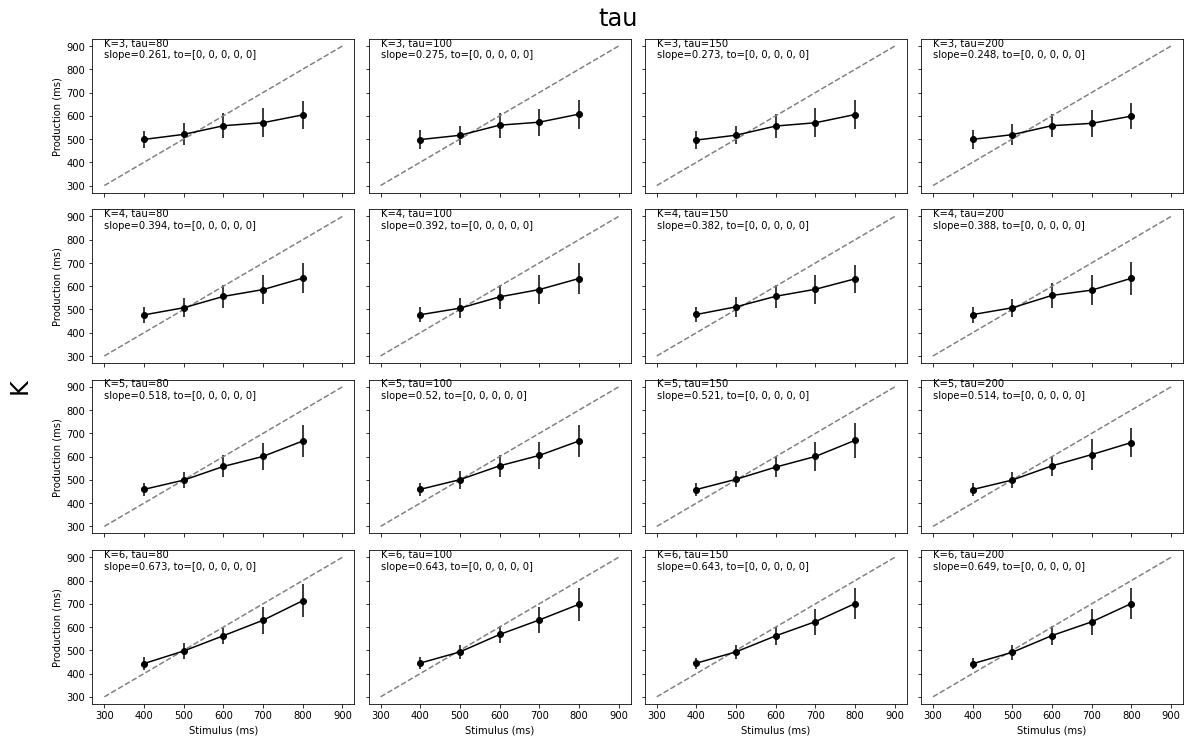

In [69]:
params = Params.from_dict({**PARAMS_DICT, 'ntrials': 500})
expsim = ExperimentSimulation(params)

stimulus_range = [400,500,600,700,800]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)

K_lst =[3,4,5,6]
tau=[80,100,150,200]
fig, ax = plt.subplots(4,4, figsize=(16,10), sharex=True, sharey=True)

i = 0
for K in K_lst:
    for t in tau:
                       
        iK = 5.0
        initI = 0.8
        exp_result = expsim.simulate(stimulus_lst, K, initI)
        plot = exp_result.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        ax.flatten()[i].text(np.min(stimulus_range)-100, np.max(stimulus_range)+100, 'K='+str(K)+', tau='+str(t))
        i += 1
        
for a in ax.flat:
    a.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
    a.label_outer()

fig.text(0.5, 1.0, 'tau', ha='center', fontsize=24)
fig.text(-0.03, 0.5, 'K', va='center', rotation='vertical',  fontsize=24)

plt.tight_layout()